# Problem Statement

A healthcare provider wants to develop a predictive model to identify individuals at risk of diabetes based on various demographic and health-related features. The dataset contains information about patients' gender, age, history of hypertension, presence of heart disease, smoking history, body mass index (BMI), HbA1c level, blood glucose level, and whether they have been diagnosed with diabetes.

In [1]:
df=pd.read_csv(r"C:\Users\HP\Downloads\rohit\diabetes_prediction_dataset.csv")

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")


In [3]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

1. Gender: This refers to the distinction between male and female, or sometimes includes other gender identities. In medical contexts, gender can be relevant for understanding certain health conditions or responses to treatments, as some conditions may affect one gender more than the other.

2. Age: Age refers to the length of time a person has lived, typically measured in years. In medical contexts, age is an important factor as certain health conditions may be more prevalent or have different presentations depending on a person's age. Additionally, age can influence treatment decisions and outcomes.

3. Hypertension: Hypertension, commonly known as high blood pressure, is a condition where the force of blood against the artery walls is consistently too high. It is a significant risk factor for various cardiovascular diseases, including stroke, heart attack, and heart failure.

4. Heart Disease: This is a broad term referring to any condition affecting the heart. It includes various conditions such as coronary artery disease, arrhythmias, heart valve problems, and congenital heart defects.

5. Smoking History: This refers to a person's past and current smoking habits. Smoking history is relevant in medical contexts because smoking is a major risk factor for various health problems, including lung cancer, cardiovascular disease, and respiratory disorders.

6. BMI (Body Mass Index): BMI is a measure of body fat based on a person's weight and height. It is calculated by dividing a person's weight in kilograms by the square of their height in meters. BMI is used as a screening tool to identify possible weight problems in adults.

7. HbA1c Level: HbA1c (hemoglobin A1c) is a measure of average blood glucose levels over the past 2 to 3 months. It is used primarily to diagnose and monitor diabetes. High levels of HbA1c indicate poorly controlled diabetes and an increased risk of diabetes-related complications.

8. Blood Glucose Level: This refers to the concentration of glucose (sugar) present in the bloodstream at a given time. Blood glucose levels are regulated by insulin and play a crucial role in energy metabolism. Abnormal blood glucose levels, either too high (hyperglycemia) or too low (hypoglycemia), can indicate various health conditions, including diabetes.

9. Diabetes: Diabetes is a chronic condition characterized by elevated blood glucose levels due to either inadequate insulin production or ineffective use of insulin by the body. There are different types of diabetes, including type 1 diabetes, type 2 diabetes, and gestational diabetes. Uncontrolled diabetes can lead to serious complications affecting the eyes, kidneys, nerves, and cardiovascular system.

In [5]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is of object type (categorical)
        unique_values = df[column].unique()
        print(f"Unique values in '{column}':")
        print(unique_values)
        print()

Unique values in 'gender':
['Female' 'Male' 'Other']

Unique values in 'smoking_history':
['never' 'No Info' 'current' 'former' 'ever' 'not current']



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [40]:
df.diabetes.value_counts()
#'0' likely represents individuals without diabetes.
#'1' likely represents individuals with diabetes.

0    91500
1     8500
Name: diabetes, dtype: int64

In [3]:
count_with_diabetes = 8500
count_without_diabetes = 91500
total_count = count_with_diabetes + count_without_diabetes

percentage_with_diabetes = (count_with_diabetes / total_count) * 100
percentage_without_diabetes = (count_without_diabetes / total_count) * 100

print("Percentage of individuals with diabetes:", percentage_with_diabetes)
print("Percentage of individuals without diabetes:", percentage_without_diabetes)

Percentage of individuals with diabetes: 8.5
Percentage of individuals without diabetes: 91.5


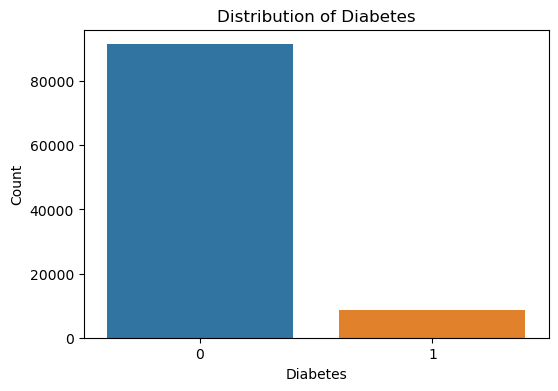

In [85]:
# Bar plot of Target Variable 'diabetes'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diabetes')
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

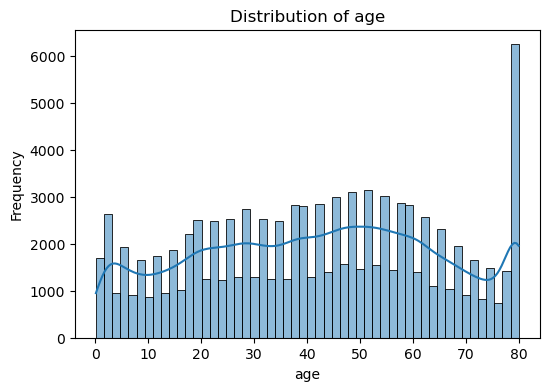

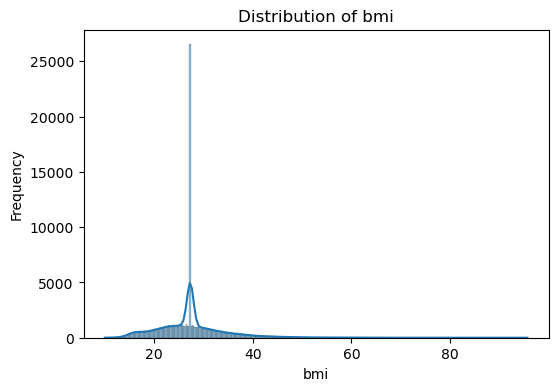

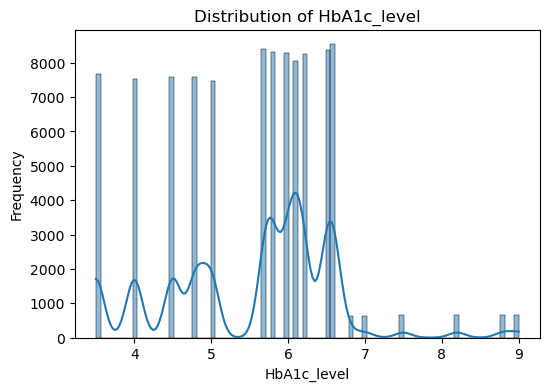

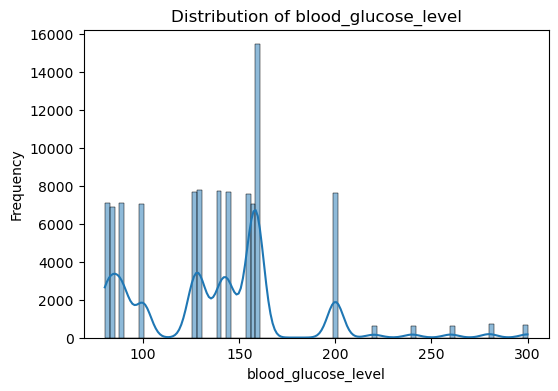

In [84]:
# Histograms or Density Plots for Numeric Features
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

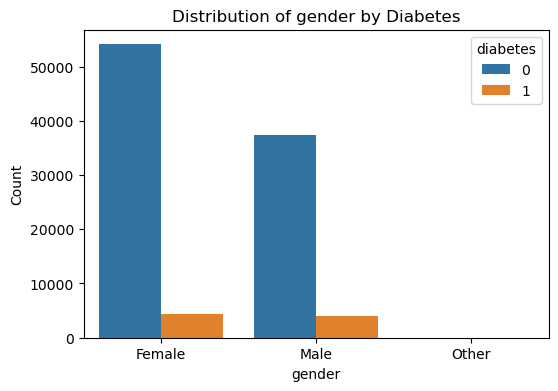

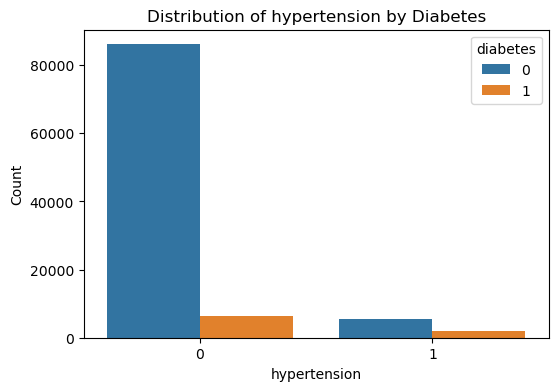

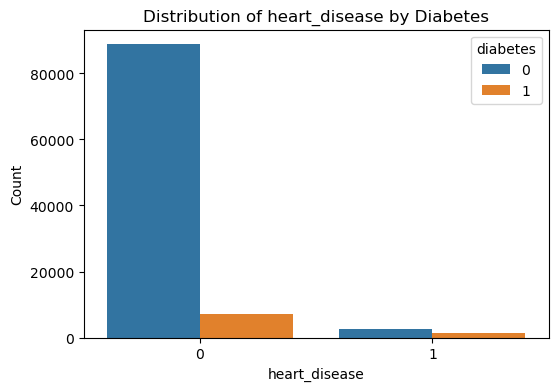

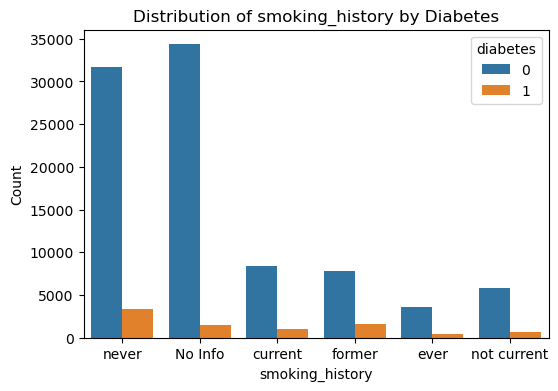

In [83]:
# Bar Plots for Categorical Features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='diabetes')
    plt.title(f'Distribution of {feature} by Diabetes')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

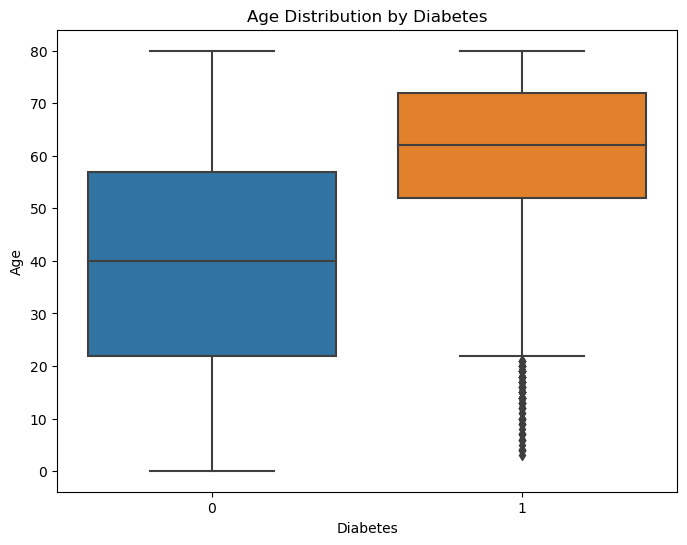

In [82]:
# Box Plots or Violin Plots
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']], x='diabetes', y='age')
plt.title('Age Distribution by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.show()

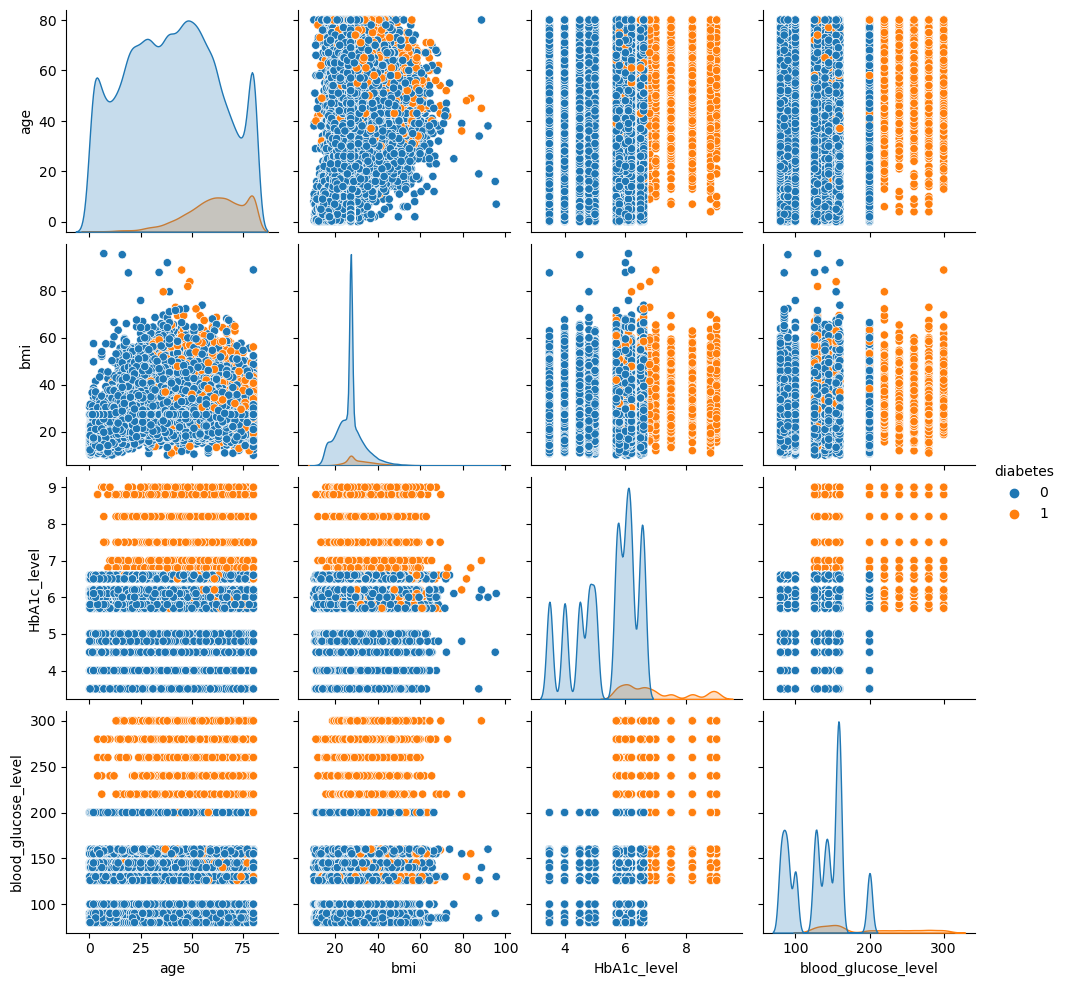

In [81]:
# Scatter Plot Matrix
sns.pairplot(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']], hue='diabetes')
plt.show()

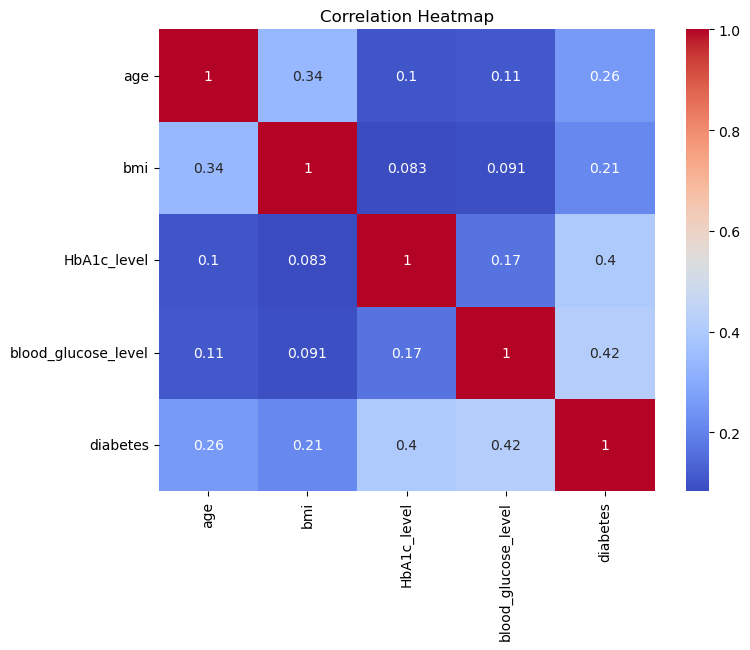

In [80]:

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

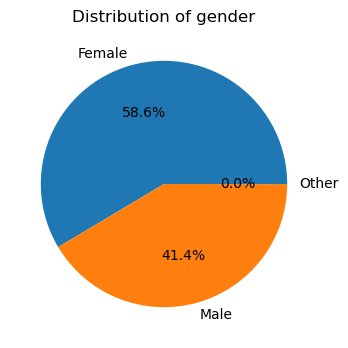

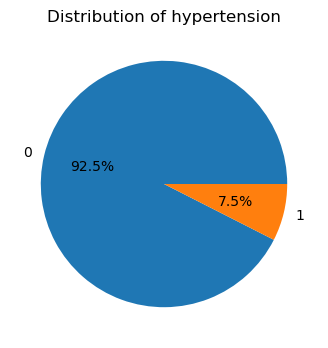

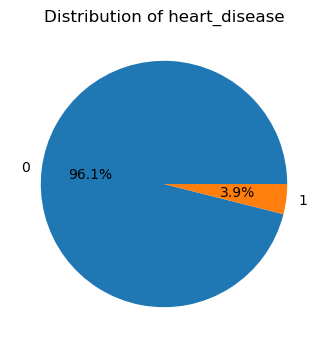

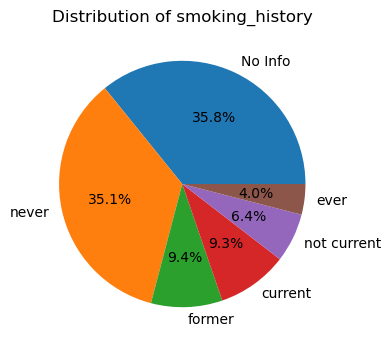

In [79]:
# Pie Chart for Binary Categorical Features
binary_categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
for feature in binary_categorical_features:
    plt.figure(figsize=(6, 4))
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribution of {feature}')
    plt.ylabel('')
    plt.show()

In [11]:
x=df.drop(['gender','smoking_history','diabetes'],axis=1)
y=df[['diabetes']]

In [87]:
# now we import train_test_split so we can use and split data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size =0.3, random_state= 42)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(70000, 6)
(70000, 1)
(30000, 6)
(30000, 1)


# LogisticRegression Model

In [14]:
logistregression = LogisticRegression()

In [15]:
logistregression.fit(x_train,y_train)

LogisticRegression()

In [16]:
logistic_y_train = logistregression.predict(x_train)
logistic_y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:

def make_confusion_matrix(y_actual, y_predict, labels=[1, 0]):
    """
    y_predict: prediction of class
    y_actual: ground truth
    """
    
    cm = confusion_matrix(y_actual, y_predict, labels=labels)
    
    df_cm = pd.DataFrame(cm, index=["diabetes", "Not diabetes"],
                         columns=["diabetes", "Not diabetes"])

    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="", cmap="Blues")
    plt.ylabel("True label")
    plt.xlabel("Predicted labels")
    plt.show()

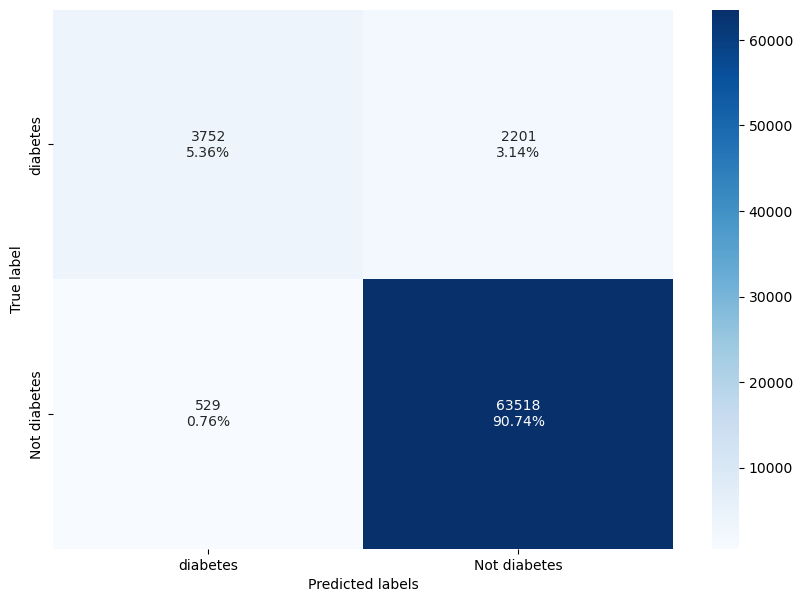

In [18]:
make_confusion_matrix(y_train,logistic_y_train)

In [19]:
recall_score(y_train,logistic_y_train)

0.6302704518730052

In [20]:
accuracy_score(y_train,logistic_y_train)

0.961

In [21]:
logistic_y_test = logistregression.predict(x_test)
logistic_y_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

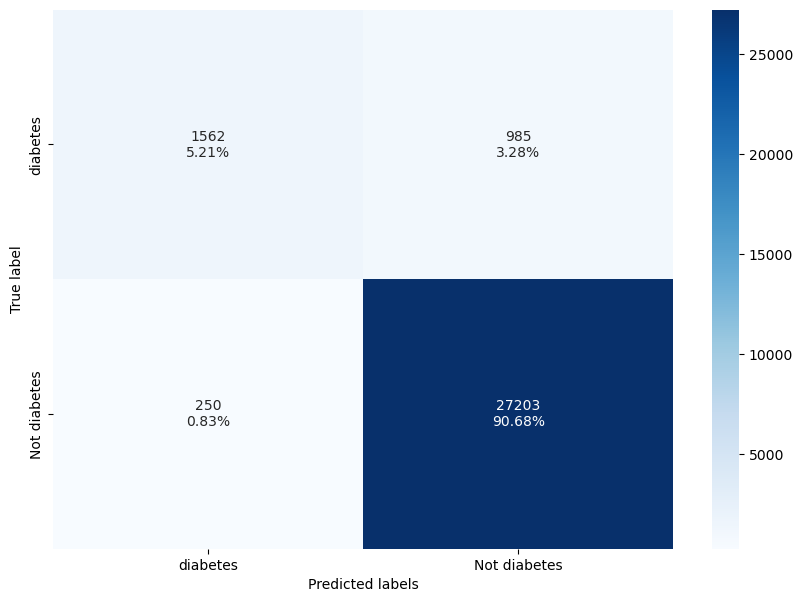

In [22]:
make_confusion_matrix(y_test,logistic_y_test)

In [23]:
recall_score(y_test,logistic_y_test)

0.613270514330585

In [24]:
accuracy_score(y_test,logistic_y_test)

0.9588333333333333

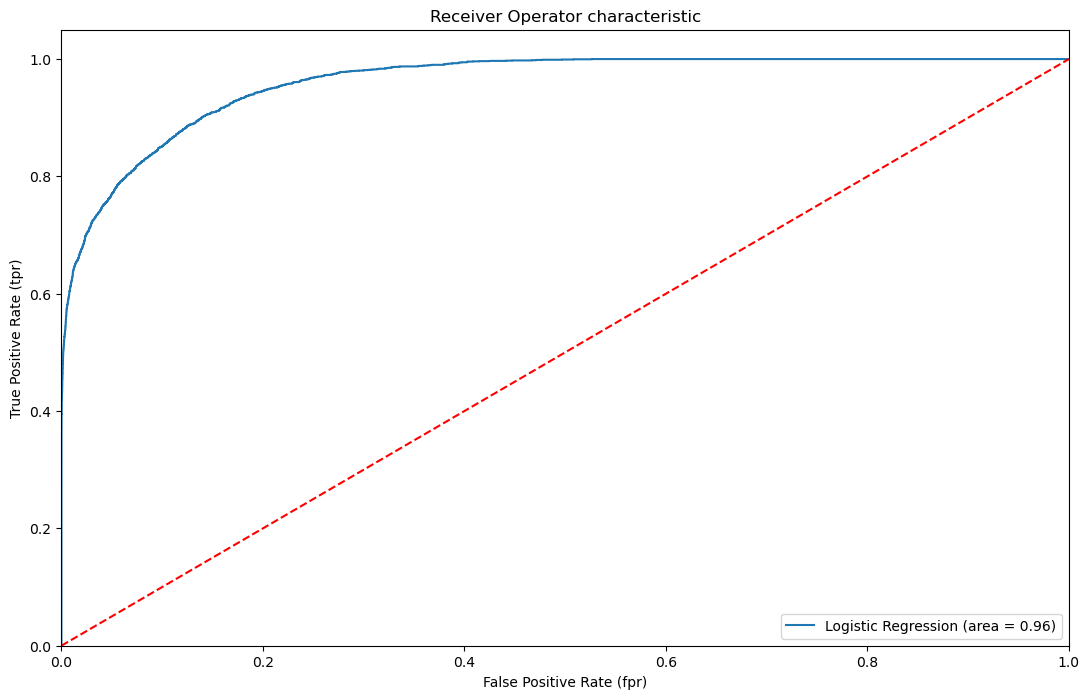

In [25]:
logit_roc_auc=roc_auc_score(y_test,logistregression.predict_proba(x_test)[:,1])
fpr,tpr, threshoulds = roc_curve(y_test,logistregression.predict_proba(x_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc = 'lower right')
plt.savefig('Log_Roc')
plt.show()

In [26]:
train_pred_prob = logistregression.predict_proba(x_train)[:,1]
train_pred_prob

array([3.37306771e-03, 1.44087331e-04, 1.36527590e-05, ...,
       1.36809674e-03, 2.81736540e-02, 1.23037155e-03])

In [27]:

column_names = ['Cutoff_prob', 'TP', 'FN', 'TN', 'FP', 'P', 'N']
cutoff_data = pd.DataFrame(columns=column_names)

cutoff_prob = np.arange(0, 1.01, 0.01)

for cutoff in cutoff_prob:
    y_train['pred_y'] = (train_pred_prob > cutoff).astype('int64')
    TP = np.logical_and((y_train['pred_y'] == 1), (y_train['diabetes'] == 1)).sum()
    FN = np.logical_and((y_train['pred_y'] == 0), (y_train['diabetes'] == 1)).sum()
    TN = np.logical_and((y_train['pred_y'] == 0), (y_train['diabetes'] == 0)).sum()
    FP = np.logical_and((y_train['pred_y'] == 1), (y_train['diabetes'] == 0)).sum()
    P = TP + FN
    N = TN + FP

    temp_data = {'Cutoff_prob': cutoff,
                 'TP': TP,
                 'FN': FN,
                 'TN': TN,
                 'FP': FP,
                 'P': P,
                 'N': N}

    cutoff_data = cutoff_data.append(temp_data, ignore_index=True)

    # Dropping the 'pred_y' column from y_train data
    y_train.drop('pred_y', axis=1, inplace=True)

In [28]:
cutoff_data['Sn'] = cutoff_data['TP']/cutoff_data['P']
cutoff_data['Sp'] = cutoff_data['TN']/cutoff_data['N']
cutoff_data['Dist'] = ((1-cutoff_data['Sn'])**2 + (1-cutoff_data['Sp'])**2)**0.5 
cutoff_data['KS'] = ((cutoff_data['TP']/cutoff_data['P']) - (cutoff_data['FP']/cutoff_data['N'])).abs()
cutoff_data['Re'] =  cutoff_data['TP']/cutoff_data['P']
cutoff_data['Pr'] = cutoff_data['TP']/(cutoff_data['TP'] + cutoff_data['FP'])
cutoff_data['tpr'] = cutoff_data['Re']
cutoff_data['fpr'] = 1 - cutoff_data['Sp']
cutoff_data['f1'] = 2 * (cutoff_data['Pr'] * cutoff_data['Re'])/(cutoff_data['Pr'] + cutoff_data['Re'])

cutoff_data.head(10)

,Cutoff_prob,TP,FN,TN,FP,P,N,Sn,Sp,Dist,KS,Re,Pr,tpr,fpr,f1
0,0.00,5953.0,0.0,0.0,64047.0,5953.0,64047.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.085043,1.000000,1.000000,0.156755
1,0.01,5881.0,72.0,40953.0,23094.0,5953.0,64047.0,0.987905,0.639421,0.360782,0.627326,0.987905,0.202968,0.987905,0.360579,0.336750
2,0.02,5770.0,183.0,46772.0,17275.0,5953.0,64047.0,0.969259,0.730276,0.271470,0.699535,0.969259,0.250380,0.969259,0.269724,0.397958
3,0.03,5668.0,285.0,49942.0,14105.0,5953.0,64047.0,0.952125,0.779771,0.225373,0.731896,0.952125,0.286654,0.952125,0.220229,0.440644
4,0.04,5570.0,383.0,52053.0,11994.0,5953.0,64047.0,0.935663,0.812731,0.198012,0.748394,0.935663,0.317126,0.935663,0.187269,0.473700
5,0.05,5474.0,479.0,53635.0,10412.0,5953.0,64047.0,0.919536,0.837432,0.181391,0.756968,0.919536,0.344580,0.919536,0.162568,0.501305
6,0.06,5381.0,572.0,54863.0,9184.0,5953.0,64047.0,0.903914,0.856605,0.172611,0.760519,0.903914,0.369447,0.903914,0.143395,0.524515
7,0.07,5297.0,656.0,55876.0,8171.0,5953.0,64047.0,0.889803,0.872422,0.168581,0.762225,0.889803,0.393303,0.889803,0.127578,0.545492
8,0.08,5225.0,728.0,56700.0,7347.0,5953.0,64047.0,0.877709,0.885287,0.167673,0.762996,0.877709,0.415606,0.877709,0.114713,0.564103
9,0.09,5141.0,812.0,57400.0,6647.0,5953.0,64047.0,0.863598,0.896217,0.171395,0.759815,0.863598,0.436121,0.863598,0.103783,0.579561


In [29]:
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data['Dist']),'Cutoff_prob']
ks_cutoff = cutoff_data.loc[np.argmax(cutoff_data['KS']),'Cutoff_prob']
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data['f1']),'Cutoff_prob']

print('The dist cutoff determined is: ',dist_cutoff)
print('The KS cutoff determined is: ',ks_cutoff)
print('The f1 cutoff determined is: ',f1_cutoff)

The dist cutoff determined is:  0.08
The KS cutoff determined is:  0.08
The f1 cutoff determined is:  0.44


In [30]:
cutoffs = [dist_cutoff, ks_cutoff, f1_cutoff]

for cutoff in cutoffs:
    y_pred_train = (logistregression.predict_proba(x_train)[:,1] > cutoff).astype(int)
    y_pred_test = (logistregression.predict_proba(x_test)[:,1] > cutoff).astype(int)
    
    print("Using the cutoff value as:", cutoff)
    print("Accuracy on train data:",accuracy_score(y_train,y_pred_train))
    print("Accuracy on test data:",accuracy_score(y_test,y_pred_test))
    print("Recall on train data:",recall_score(y_train,y_pred_train))
    print("Recall on test data:",recall_score(y_test,y_pred_test))
    print("Precision score on train data:",precision_score(y_train,y_pred_train))
    print("Precision score on test data:",precision_score(y_test,y_pred_test))
    print("f1 score on train data:",f1_score(y_train,y_pred_train))
    print("f1 score on test data:",f1_score(y_test,y_pred_test))
    print('\n')

Using the cutoff value as: 0.08
Accuracy on train data: 0.8846428571428572
Accuracy on test data: 0.8835333333333333
Recall on train data: 0.8777087182932976
Recall on test data: 0.8731841382018061
Precision score on train data: 0.4156061088132358
Precision score on test data: 0.41223354958294717
f1 score on train data: 0.5641025641025641
f1 score on test data: 0.5600604381767816


Using the cutoff value as: 0.08
Accuracy on train data: 0.8846428571428572
Accuracy on test data: 0.8835333333333333
Recall on train data: 0.8777087182932976
Recall on test data: 0.8731841382018061
Precision score on train data: 0.4156061088132358
Precision score on test data: 0.41223354958294717
f1 score on train data: 0.5641025641025641
f1 score on test data: 0.5600604381767816


Using the cutoff value as: 0.44
Accuracy on train data: 0.9597
Accuracy on test data: 0.9585666666666667
Recall on train data: 0.6529480933982866
Recall on test data: 0.6391833529642716
Precision score on train data: 0.83735458853

# DecisionTreeClassifier Model

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', class_weight={1: 0.10, 0: 0.89}, random_state=1)

In [32]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.89, 1: 0.1}, random_state=1)

In [48]:
def make_confusion_matrix(model, y_actual, labels=[0, 1]):

    '''
    model : classifier to predict values of X
    y_actual : ground truth
    
    '''
    
    y_predict = model.predict(x_test)
    cm=metrics.confusion_matrix(y_actual, y_predict, labels=[0,1])
    df_cm = pd.DataFrame(cm, index=["Actual - No", "Actual - Yes"],
                     columns=['Predicted - No', 'Predicted - Yes'])

    group_counts = ["{0:0.0f}". format (value) for value in
                cm. flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm. flatten()/np.sum(cm)]
    labels = [f"({v1}\n{v2})" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicetd label')

In [52]:
## Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X
    
    '''
    pred_train= model.predict(x_train)
    pred_test= model.predict(x_test)
    print("Recall on training set: ", metrics.recall_score(y_train,pred_train))
    print("Recall on test set: ", metrics.recall_score(y_test,pred_test))


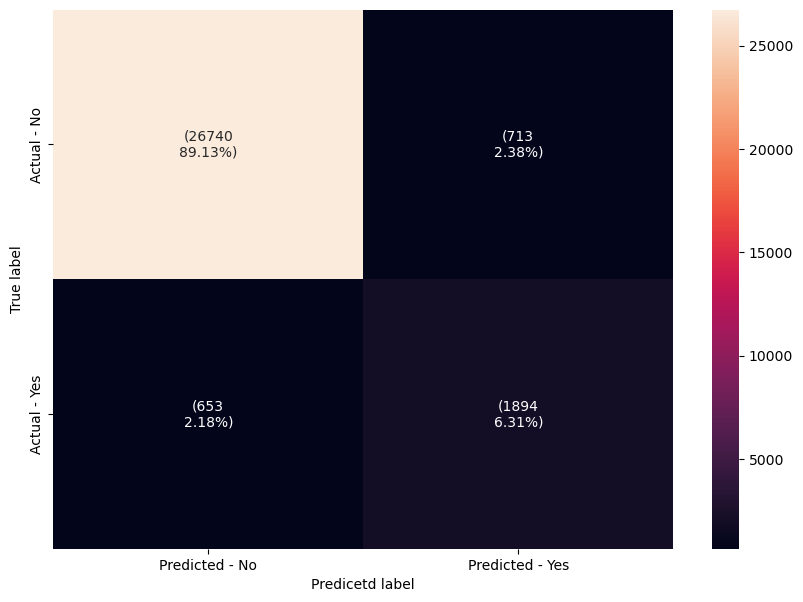

In [53]:

make_confusion_matrix(model, y_test, x_test)

In [54]:
get_recall_score(model)

Recall on training set:  0.9699311271627751
Recall on test set:  0.7436199450333726


In [65]:
feature_names = x.columns

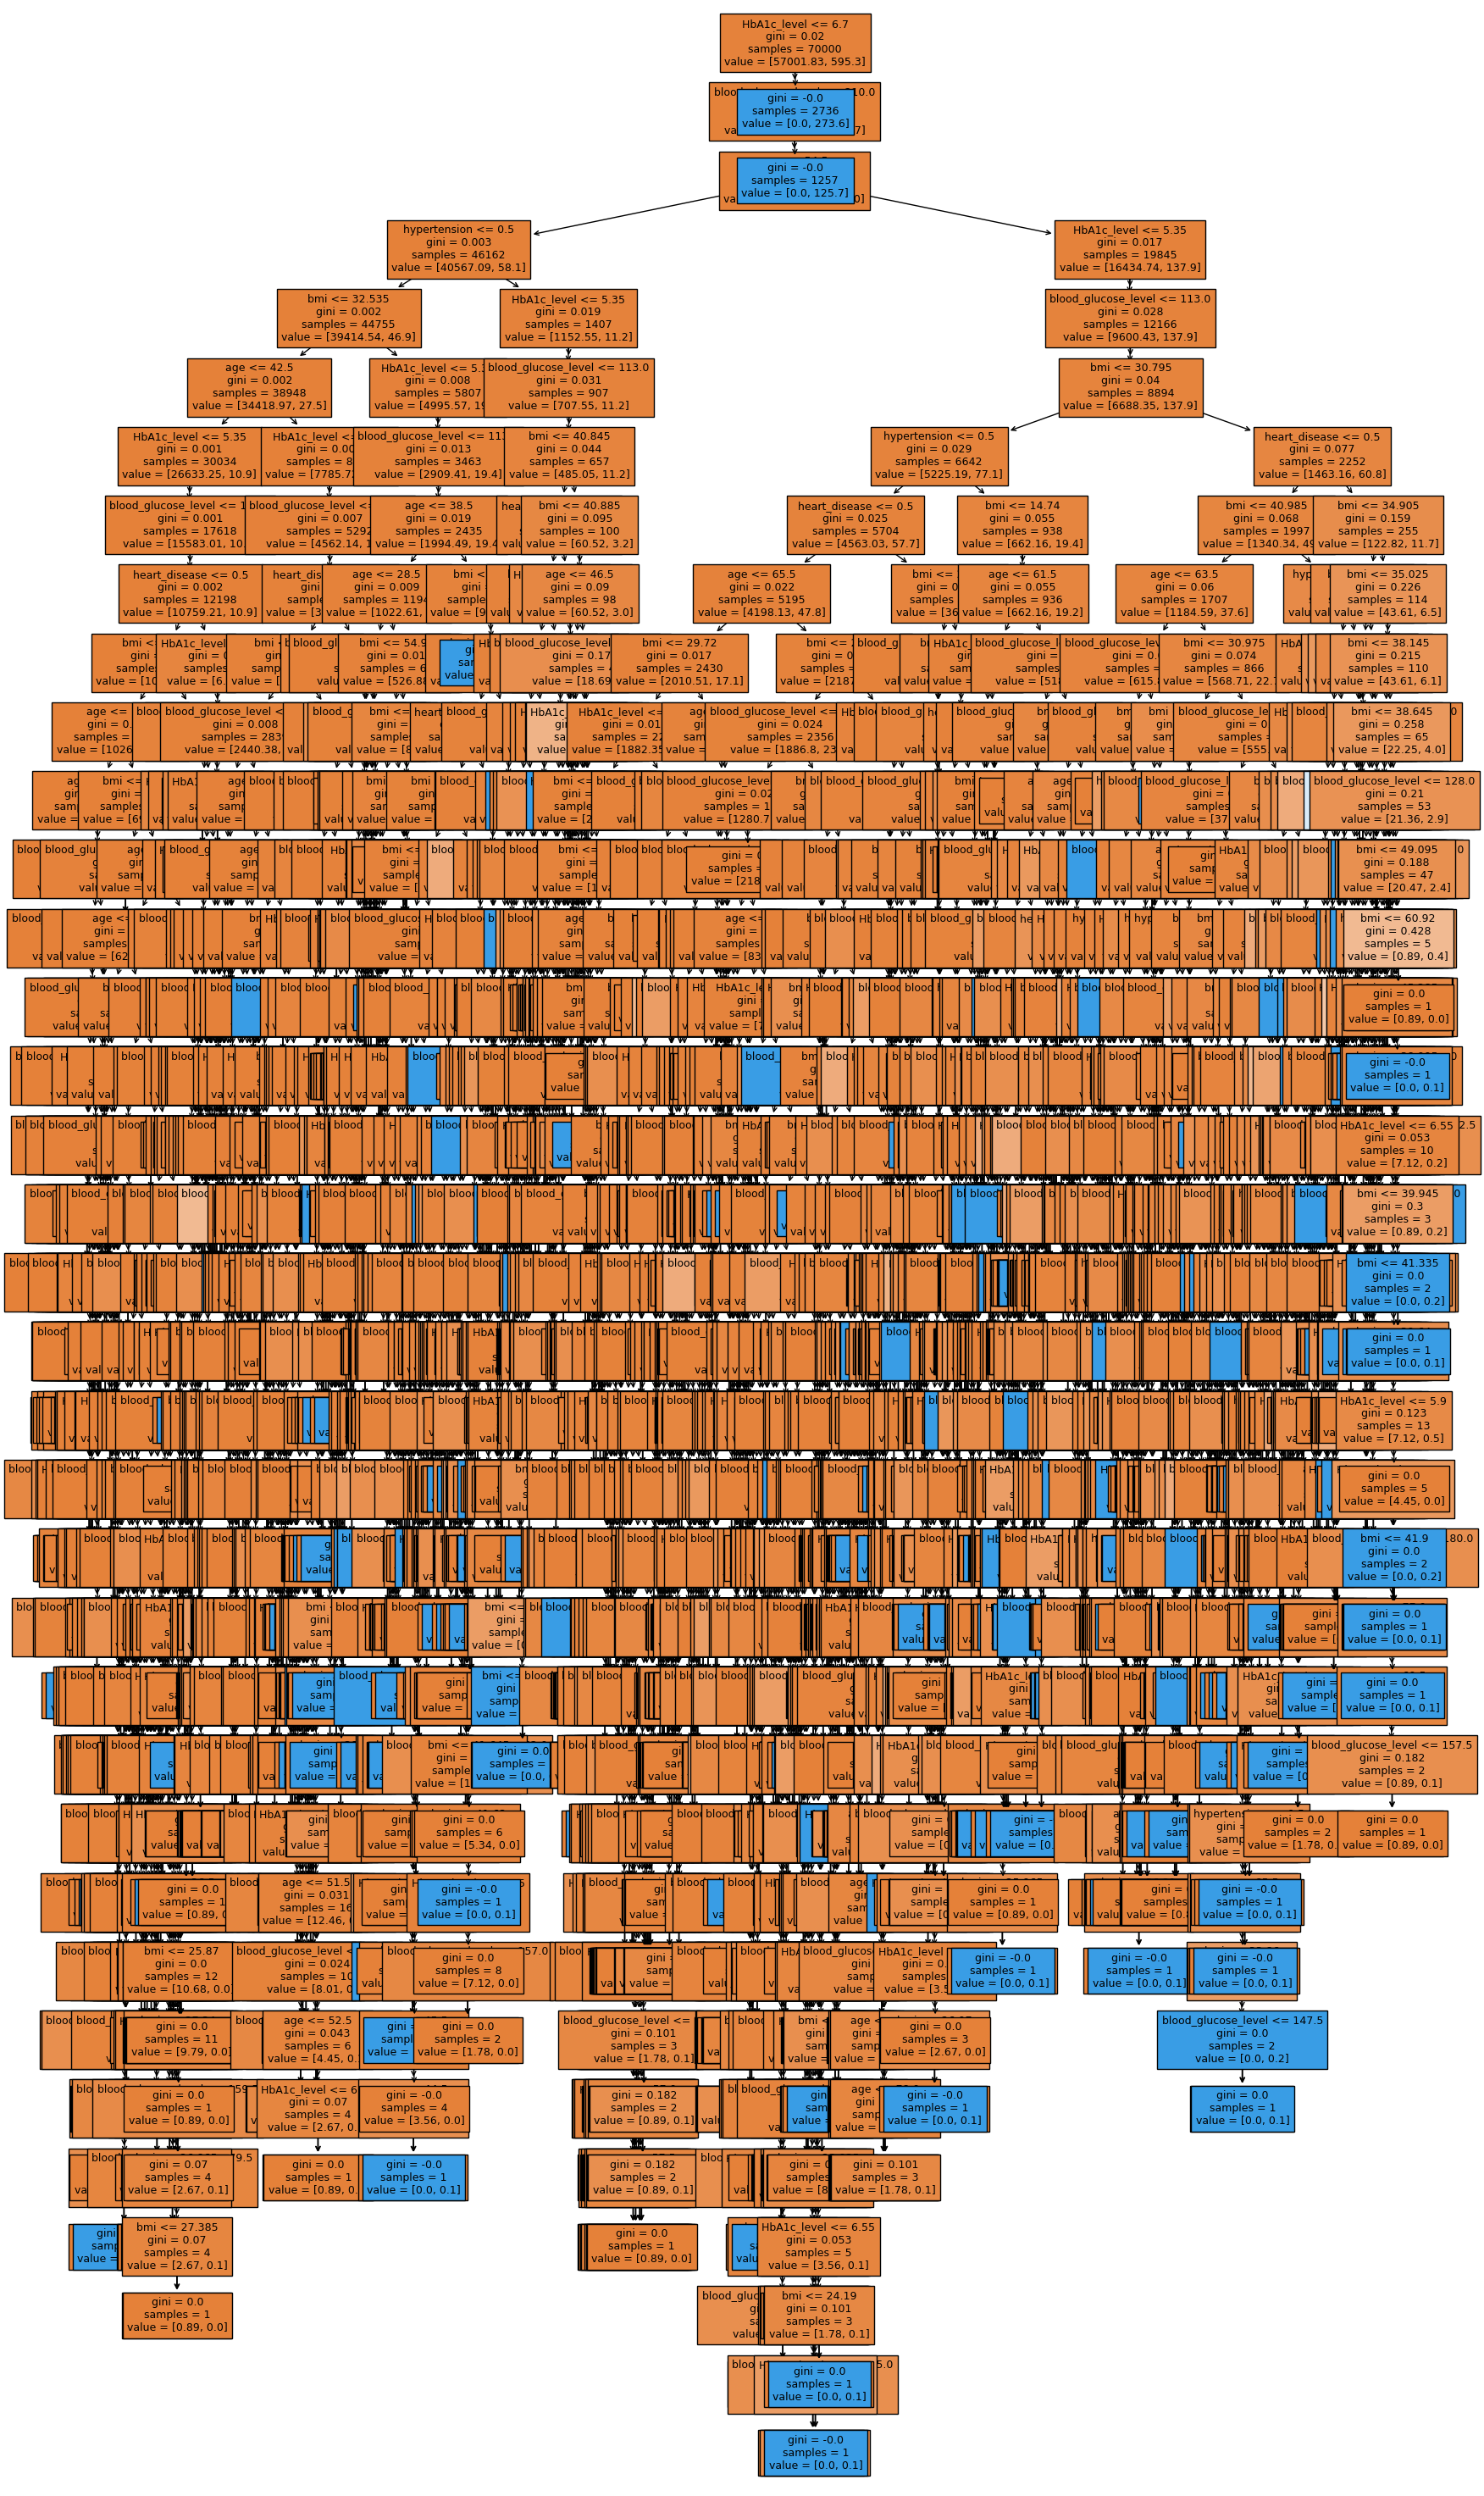

In [66]:
import sklearn.tree as tree

plt.figure(figsize=(20,38))
out = tree.plot_tree(model,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()

In [56]:
from sklearn.model_selection import GridSearchCV

In [1]:
estimator = DecisionTreeClassifier(random_state=1, class_weight={0:0.11, 1:0.89})

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(1, 15),
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random'],
    'max_features': ['log2', 'sqrt']
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.                                 I
estimator.fit(x_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined

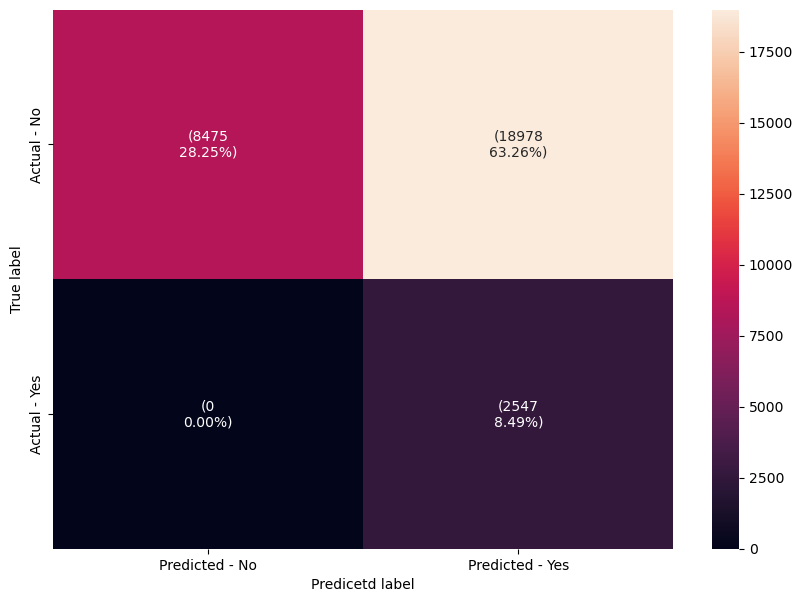

In [59]:
make_confusion_matrix(estimator, y_test)

In [60]:
get_recall_score(estimator)

Recall on training set:  1.0
Recall on test set:  1.0


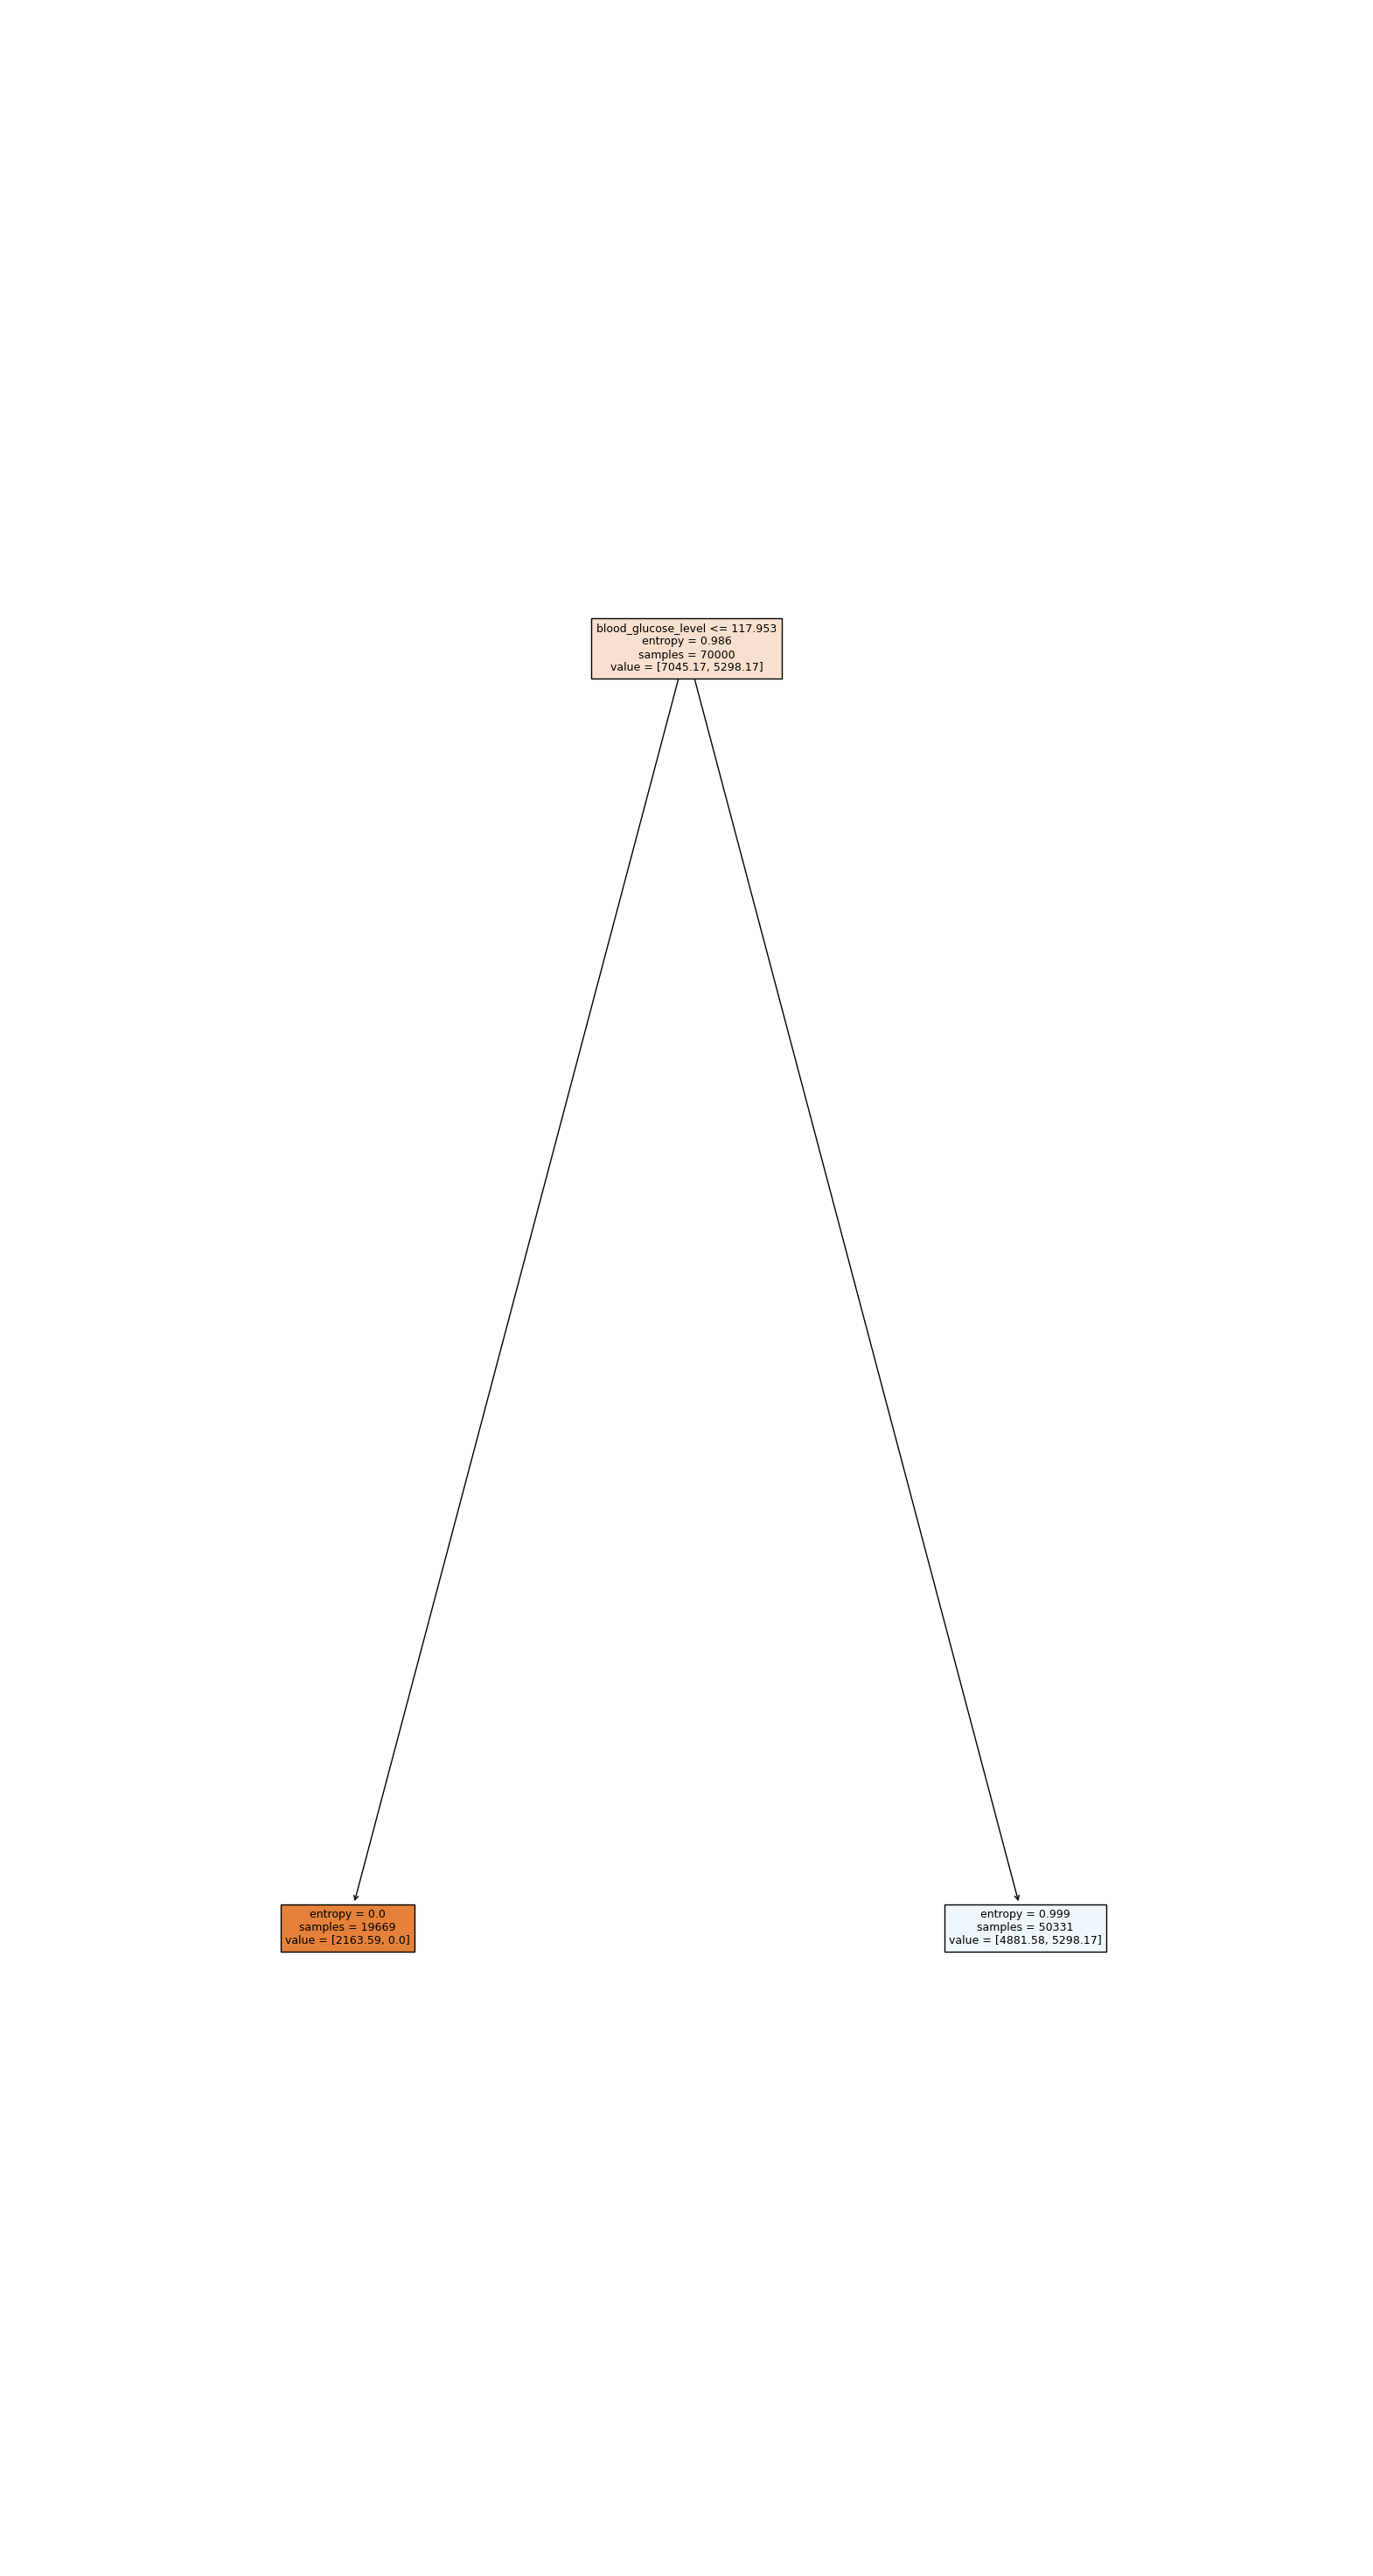

In [67]:
plt.figure(figsize=(20,38))
out = tree.plot_tree(estimator,feature_names=feature_names, filled=True, fontsize=9, node_ids=False, class_names=None,)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_linewidth(1)
        arrow.set_edgecolor('black')

plt.show()

In [73]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=1)

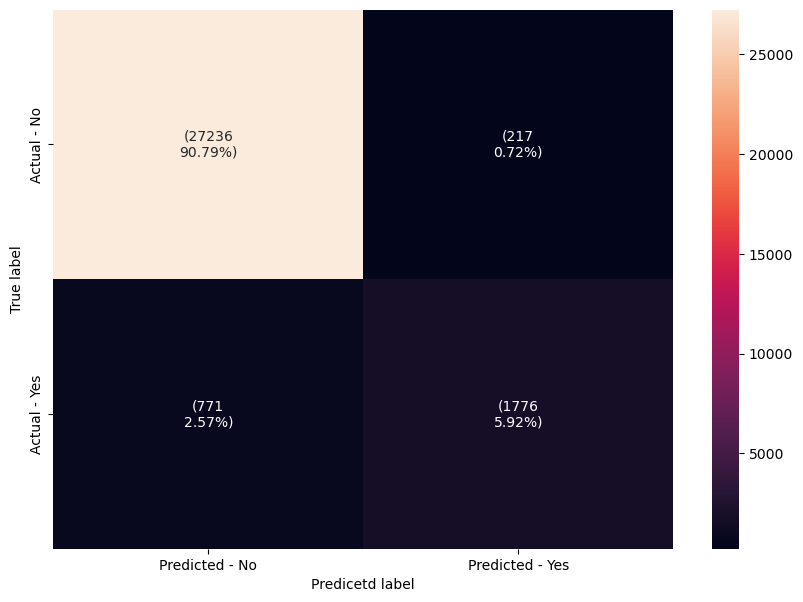

In [74]:
make_confusion_matrix(bagging,y_test)

In [75]:
get_recall_score(bagging)

Recall on training set:  0.928439442298001
Recall on test set:  0.6972909305064782


In [2]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.11,1:0.89},random_state=1),random_state=1)
bagging_wt.fit(x_train,y_train)

NameError: name 'BaggingClassifier' is not defined

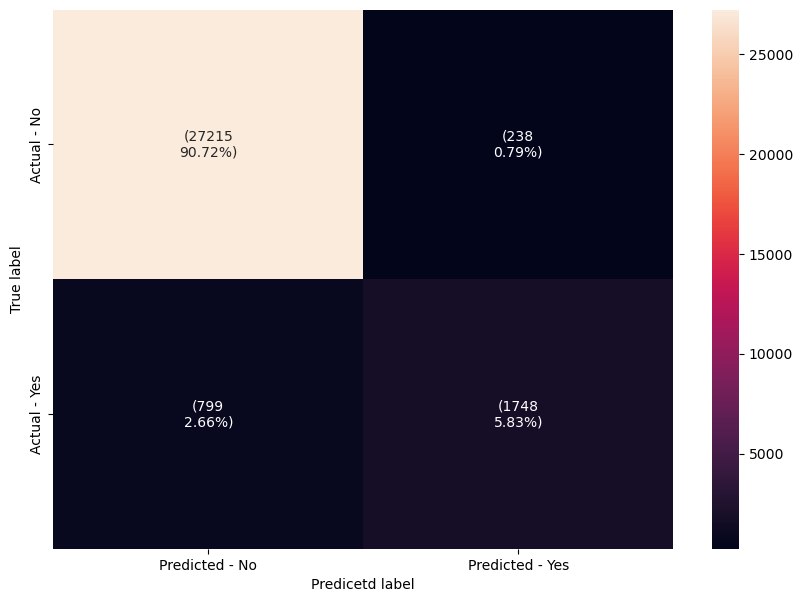

In [77]:
make_confusion_matrix(bagging_wt,y_test)

In [78]:
get_recall_score(bagging_wt)

Recall on training set:  0.9388543591466487
Recall on test set:  0.6862976050255202


In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

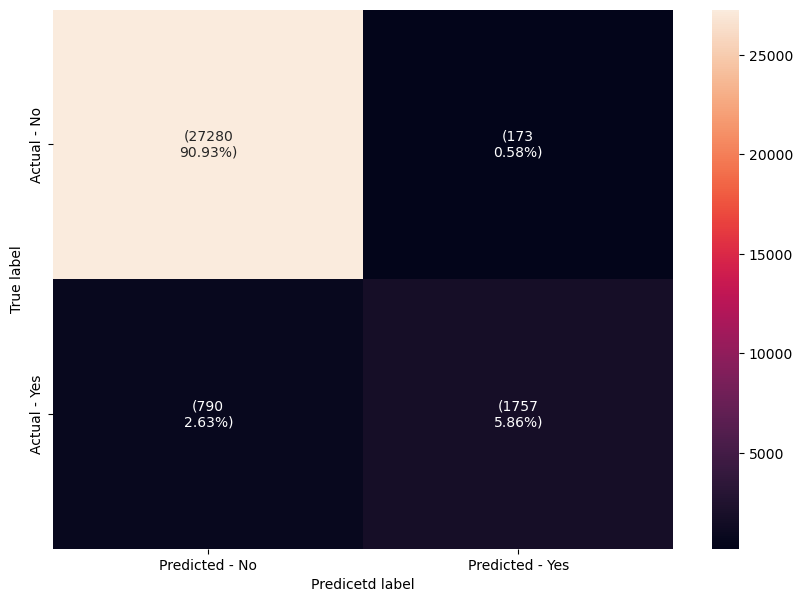

In [80]:
make_confusion_matrix(rf,y_test)

In [81]:
get_recall_score(rf)

Recall on training set:  0.9719469175205778
Recall on test set:  0.6898311739301138


In [82]:
rf_wt = RandomForestClassifier(class_weight={0:0.11,1:0.89},random_state=1)
rf_wt.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.11, 1: 0.89}, random_state=1)

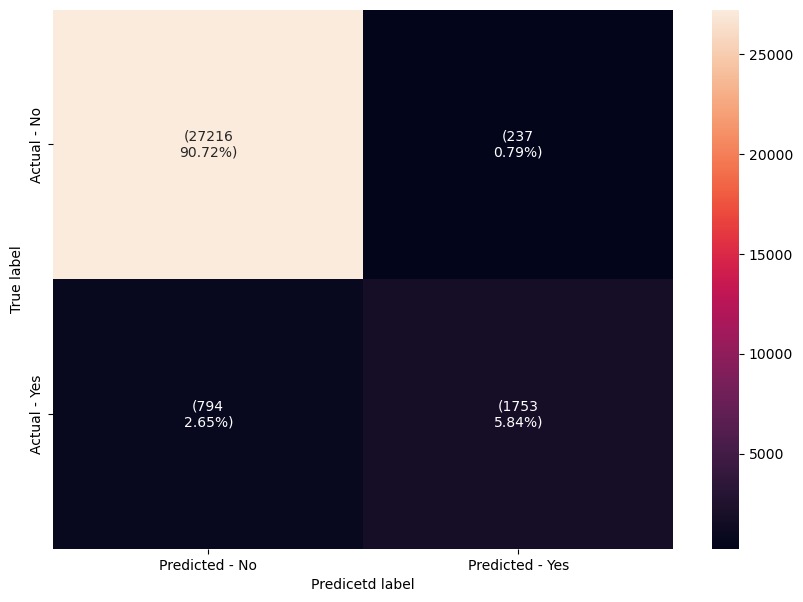

In [83]:
make_confusion_matrix(rf_wt,y_test)

In [84]:
get_recall_score(rf_wt)

Recall on training set:  0.9946245590458592
Recall on test set:  0.6882606988614056


In [85]:
# grid search for bagging classifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
cl1 = DecisionTreeClassifier(class_weight={0:0.11,1:0.89},random_state=1)
param_grid = {'base_estimator':[cl1],
             'n_estimators':[5,7,15,51,101],
             'max_features':[0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid ,scoring='recall', cv = 5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.11,
                                                                                 1: 0.89},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [192]:
# getting the best parameter
bagging_estimator = grid.best_estimator_
bagging_estimator.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.11,
                                                                      1: 0.89},
                                                        random_state=1),
                  max_features=0.9, n_estimators=5, random_state=1)

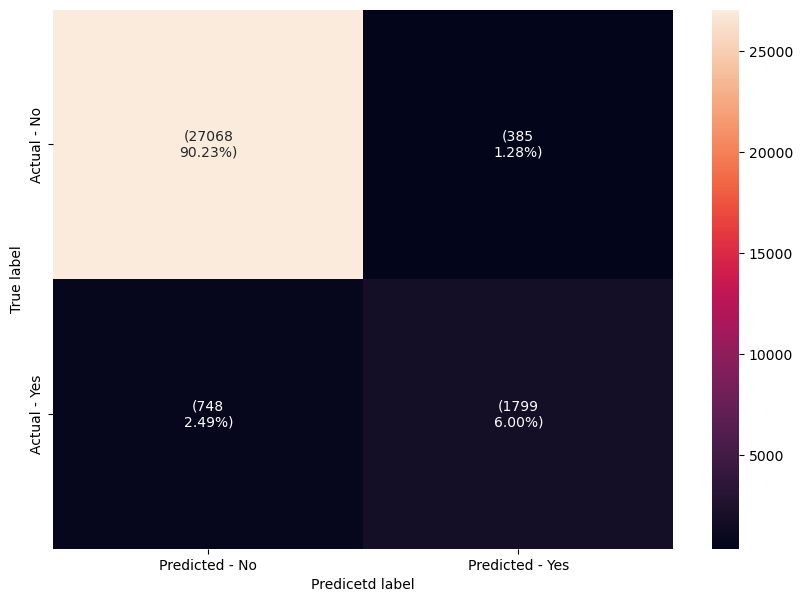

In [193]:
make_confusion_matrix(bagging_estimator,y_test)

In [194]:
get_recall_score(bagging_estimator)

Recall on training test:  0.9348227784310432
Recall on test set:  0.7063211621515508


# SMOTH Method

In [196]:
from imblearn.over_sampling import SMOTE


In [197]:
 #Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)

# Now you can proceed with modeling using the balanced data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [204]:

from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[20158  2621]
 [ 2618 20353]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     22779
           1       0.89      0.89      0.89     22971

    accuracy                           0.89     45750
   macro avg       0.89      0.89      0.89     45750
weighted avg       0.89      0.89      0.89     45750



In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pandas as pd

# Define a list of models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=1),
    'Random Forest': RandomForestClassifier(random_state=1),
    'Logistic Regression': LogisticRegression(random_state=1)
}

# Initialize a DataFrame to store performance metrics
results = pd.DataFrame(columns=['Model', 'Mean Accuracy', 'Mean Recall', 'Mean Precision', 'Mean F1 Score'])

# Iterate through each model
for model_name, model in models.items():
    # Perform cross-validation
    accuracy_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    recall_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='recall')
    precision_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='precision')
    f1_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='f1')

    # Calculate mean scores
    mean_accuracy = accuracy_scores.mean()
    mean_recall = recall_scores.mean()
    mean_precision = precision_scores.mean()
    mean_f1 = f1_scores.mean()

    # Store results in DataFrame
    results = results.append({'Model': model_name,
                              'Mean Accuracy': mean_accuracy,
                              'Mean Recall': mean_recall,
                              'Mean Precision': mean_precision,
                              'Mean F1 Score': mean_f1}, ignore_index=True)

# Print the results
print(results)


                 Model  Mean Accuracy  Mean Recall  Mean Precision  \
0        Decision Tree       0.953271     0.735261        0.721290   
1        Random Forest       0.969000     0.695783        0.920267   
2  Logistic Regression       0.961086     0.628926        0.879108   

   Mean F1 Score  
0       0.728078  
1       0.792410  
2       0.733194  


In [90]:
results

,Model,Mean Accuracy,Mean Recall,Mean Precision,Mean F1 Score
0,Decision Tree,0.953271,0.735261,0.721290,0.728078
1,Random Forest,0.969000,0.695783,0.920267,0.792410
2,Logistic Regression,0.961086,0.628926,0.879108,0.733194
